Данное задание основано на материалах лекций по логическим методам и направлено на знакомство со случайными лесами (Random Forests).

Вы научитесь:

работать со случайным лесом — одним из наиболее распространенных семейств алгоритмов
решать с его помощью задачи регрессии
подбирать параметры случайного леса
Введение

Случайный лес — это модель классификации, объединяющая некоторое количество решающих деревьев в одну композицию, за счет чего улучшается их качество работы и обобщающая способность. Деревья строятся независимо друг от друга. Чтобы они отличались друг от друга, обучение проводится не на всей обучающей выборке, а на ее случайном подмножестве. Также, для дальнейшего уменьшения схожести деревьев, оптимальный признак для разбиения выбирается не из всех возможных признаков, а лишь из их случайного подмножества. Прогнозы, выданные деревьями, объединяются в один ответ путем усреднения.

Особенность случайного леса заключается в том, что он не переобучается по мере увеличения количества деревьев в композиции. Это достигается за счет того, что деревья не зависят друг от друга, и поэтому добавление нового дерева в композицию не усложняет модель, а лишь понижает уровень шума в прогнозах.

Реализация в Scikit-Learn

В библиотеке scikit-learn случайные леса реализованы в классах sklearn.ensemble.RandomForestClassifier (для классификации) и sklearn.ensemble.RandomForestRegressor (для регрессии). Обучение модели производится с помощью функции fit, построение прогнозов — с помощью функции predict. Число деревьев задается с помощью поля класса n_estimators.

Пример использования:


```
import numpy as np
from sklearn.ensemble import RandomForestRegressor
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([-3, 1, 10])
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X, y)
predictions = clf.predict(X)
```

Также в этом задании вам понадобится вычислять качество предсказаний на тестовой выборке. Мы будем пользоваться метрикой R2 — по сути, это среднеквадратичная ошибка (MSE), нормированная на отрезок [0, 1] и обращенная так, чтобы ее наилучшим значением была единица. Ее можно вычислить с помощью функции sklearn.metrics.r2_score. Первым аргументов является список правильных ответов на выборке, вторым — список предсказанных ответов. Пример использования:


```
from sklearn.metrics import r2_score
print r2_score([10, 11, 12], [9, 11, 12.1])
```

Инструкция по выполнению

В этом задании вам нужно проследить за изменением качества случайного леса в зависимости от количества деревьев в нем.

- Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.
- Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1. Если вы используете Pandas, то подойдет следующий код: data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))
- Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.
- Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).
- Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.
- Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

- Ответ на каждое задание — текстовый файл, содержащий ответ в первой строчке. Обратите внимание, что отправляемые файлы не должны содержать перевод строки в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над тем, чтобы убрать это ограничение.



In [2]:
import pandas as pd
import sklearn
import numpy as np

In [3]:
data = pd.read_csv('data/abalone.csv')

In [5]:
data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [6]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
y = data[['Rings']]
y = y['Rings']
del data['Rings']
X = data
X = X.as_matrix()

In [8]:
X.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [43]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [44]:
total_scores = []
for n_estimators in range(1, 51):
    scores = []
    r = {'n_estimators': n_estimators, 'mean_score': 0}
    
    kf = KFold(n_splits=5, random_state=1, shuffle=True)
    for train_indices, test_indices in kf.split(X, y):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        
        forest = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
        forest.fit(X_train, y_train)
        
        y_pred = forest.predict(X_test)
        scores.append(r2_score(y_test, y_pred))
        
    r['mean_score'] = np.mean(scores)
    total_scores.append(r)

In [45]:
total_scores = pd.DataFrame(total_scores)

In [48]:
total_scores.head()

,mean_score,n_estimators
0,0.102139,1
1,0.338417,2
2,0.403580,3
3,0.442722,4
4,0.464021,5


In [47]:
total_scores[total_scores.mean_score > 0.52]

,mean_score,n_estimators
21,0.520158,22
22,0.521017,23
23,0.522403,24
24,0.522617,25
25,0.523806,26
26,0.524122,27
27,0.525054,28
28,0.525970,29
29,0.526538,30
30,0.527100,31


In [50]:
ans = total_scores[total_scores.mean_score > 0.52].n_estimators.min()

In [52]:
with open('ans_t1_random_forest_1.txt', 'w') as fp:
    fp.write(str(ans))

In [57]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

pylab.rcParams['figure.figsize'] = 12.0, 7.0

plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'serif'

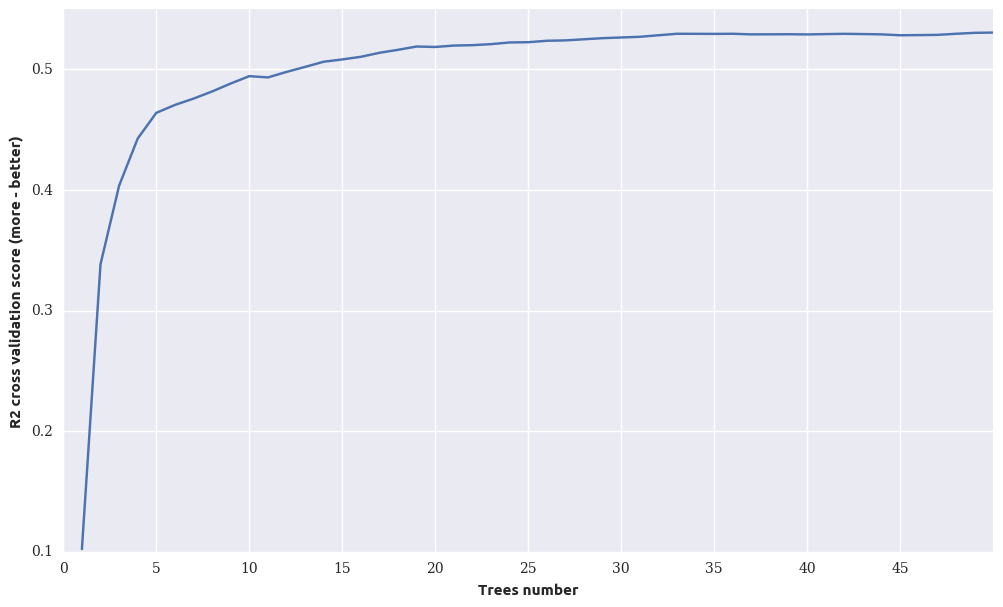

In [62]:
plt.plot(total_scores.n_estimators, total_scores.mean_score)
plt.xlabel('Trees number')
plt.ylabel('R2 cross validation score (more - better)')
plt.xticks(range(0, 50, 5));
# plt.yticks(range(0, 50, 5));